                           PROJET 2 
     Analysez des données de systèmes éducatifs - EdTech (Academy)

# I - Importation et chargement des données

In [1]:
# Importation des packages
import pandas as pd #version 1.4.4

import numpy as np #version 1.21.5
import matplotlib.pyplot as plt # version 3.5.2
import seaborn as sns

from datetime import date #Version 2.8.2

In [2]:
#Chargement du jeu de données
csdata = pd.read_csv('/Users/Leyla/Desktop/Openclassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv-2/EdStatsCountry-Series.csv')
cdata = pd.read_csv('/Users/Leyla/Desktop/Openclassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv-2/EdStatsCountry.csv')
data = pd.read_csv('/Users/Leyla/Desktop/Openclassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv-2/EdStatsData.csv')
fndata = pd.read_csv('/Users/Leyla/Desktop/Openclassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv-2/EdStatsFootNote.csv')
sdata = pd.read_csv('/Users/Leyla/Desktop/Openclassrooms/Projet 2/Projet+Python_Dataset_Edstats_csv-2/EdStatsSeries.csv')

# II - Analyse des données du fichier Country-Series

## 1. Description des informations du tableau

In [3]:
# Affichage de la taille du tableau (nombre de lignes & nombre de colonnes)
csdata.shape

(613, 4)

In [4]:
# Nombres de valeurs dans le tableau
csnnull = csdata.notnull().sum().sum()
csnnull

1839

In [5]:
#Affichage des noms et les types de colonne
csdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB


In [6]:
#Combien de pays et d'indicateurs dans le fichier csdata ?
csdata.describe(exclude=np.number)

,CountryCode,SeriesCode,DESCRIPTION
count,613,613,613
unique,211,21,97
top,MDA,SP.POP.TOTL,Data sources : United Nations World Population...
freq,18,211,154


## 2. Validation de la qualité du jeu de données

### A) Données manquantes

In [7]:
# Nombres de valeurs manquantes
csnull = csdata.isnull().sum().sum()
csnull

613

In [8]:
# Verification des taux valeurs manquantes par colonne 
csPourcentage = (csdata.isnull().sum() /len(csdata))*100
csPourcentage

CountryCode      0.0
SeriesCode       0.0
DESCRIPTION      0.0
Unnamed: 3     100.0
dtype: float64

In [9]:
cssPourcentage = (csdata.notnull().sum() /len(csdata))*100
cssPourcentage

CountryCode    100.0
SeriesCode     100.0
DESCRIPTION    100.0
Unnamed: 3       0.0
dtype: float64

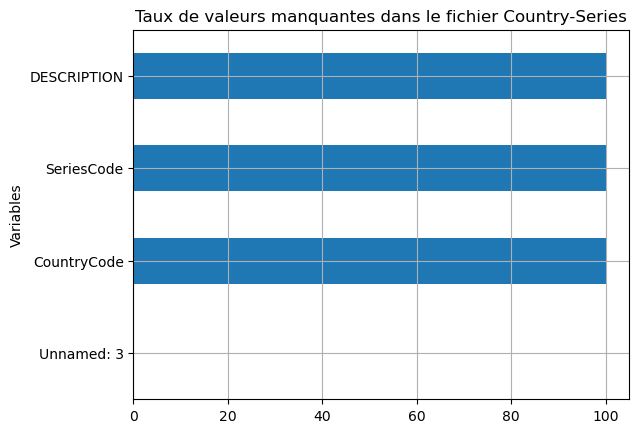

In [10]:
cssPourcentage.sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Variables')
plt.title("Taux de valeurs manquantes dans le fichier Country-Series")
plt.grid()
plt.show()

In [11]:
# Vérification du taux valeurs manquantes totales du tableau
Totcsnull=(csPourcentage.sum()/csdata.shape[1])
Totcsnull

25.0

In [12]:
Totcssnull=(cssPourcentage.sum()/csdata.shape[1])
Totcssnull

75.0

In [13]:
# Suppression de la colonne vide
csdata = csdata.drop(columns='Unnamed: 3')

In [14]:
# Vérification des taux valeurs manquantes par colonnes 
csPourcentage = (csdata.isnull().sum() /len(csdata))*100
csPourcentage
Totcsnull=(csPourcentage.sum()/csdata.shape[1])
Totcsnull

0.0

### B) Données dupliquées 

In [15]:
# Vérification des valeurs dupliqueés dans le jeu de données 
csdata.duplicated().sum()

0

In [16]:
csdata.duplicated(['CountryCode','SeriesCode']).sum()

0

## 3. Sélection des informations qui semblent pertinentes pour répondre à la problématique 

# III - Analyse des données du fichier Country

## 1. Description des informations du tableau

In [17]:
# Affichage de la taille du tableau (nombre de lignes & nombre de colonnes)
cdata.shape

(241, 32)

In [18]:
# Nombres de valeurs dans le tableau
cnnull = cdata.notnull().sum().sum()
cnnull

5358

In [19]:
#Affichage des noms et les types de colonne
cdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [20]:
#Combien de region et de type de niveau de vie dans le fichier cdata ?
cdata.describe(exclude=np.number)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest water withdrawal data
count,241,241,241,241,238,215,145,214,214,240,...,124,200,161,181,213,141,160,111,142,179
unique,241,241,241,241,238,152,131,7,5,240,...,3,2,2,2,27,60,75,2,35,20
top,ABW,Aruba,Aruba,Aruba,AW,Euro,April 2012 database update: Based on official ...,Europe & Central Asia,Upper middle income,AW,...,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),2011,"World Health Survey (WHS), 2003","Integrated household survey (IHS), 2012",Yes,2010,2000
freq,1,1,1,1,1,23,6,57,55,1,...,107,106,95,110,59,10,15,110,36,40


## 2. Validation de la qualité du jeu de données

### A) Données manquantes

In [21]:
#Nombres de valeurs dans le tableau
cnull = cdata.isnull().sum().sum()
cnull

2354

In [22]:
# Vérification des taux valeurs manquantes par colonne 
cPourcentage = (cdata.isnull().sum() /len(cdata))*100
cPourcentage

Country Code                                           0.000000
Short Name                                             0.000000
Table Name                                             0.000000
Long Name                                              0.000000
2-alpha code                                           1.244813
Currency Unit                                         10.788382
Special Notes                                         39.834025
Region                                                11.203320
Income Group                                          11.203320
WB-2 code                                              0.414938
National accounts base year                           14.937759
National accounts reference year                      86.721992
SNA price valuation                                   18.257261
Lending category                                      40.248963
Other groups                                          75.933610
System of National Accounts             

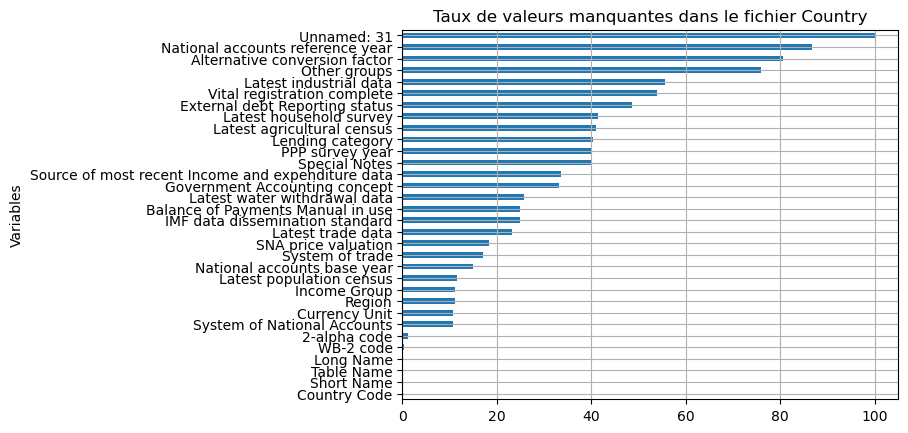

In [23]:
cPourcentage.sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Variables')
plt.title("Taux de valeurs manquantes dans le fichier Country")
plt.grid()
plt.show()

In [24]:
# Verification du taux valeurs manquantes totales du tableau
Totcnull=(cPourcentage.sum()/cdata.shape[1])
Totcnull

30.523858921161825

In [25]:
# Suppression de la colonne vide
cdata = cdata.drop(columns='Unnamed: 31')

In [26]:
# Verification du taux valeurs manquantes totales du tableau
cPourcentage = (cdata.isnull().sum() /len(cdata))*100
Totcnull=(cPourcentage.sum()/cdata.shape[1])
Totcnull

28.28269307990898

### B) Données dupliquées  

In [27]:
# Vérification des valeurs dupliquées dans le jeu de données 
cdata.duplicated().sum()

0

In [28]:
cdata.duplicated(['Country Code','Table Name']).sum()

0

## 3. Sélection des informations qui semblent pertinentes pour répondre à la problématique  

In [29]:
#Nombre de pays par region:
RTN = cdata.groupby("Region")["Table Name"].count().sort_values()
RTN

Region
North America                  3
South Asia                     8
Middle East & North Africa    21
East Asia & Pacific           36
Latin America & Caribbean     41
Sub-Saharan Africa            48
Europe & Central Asia         57
Name: Table Name, dtype: int64

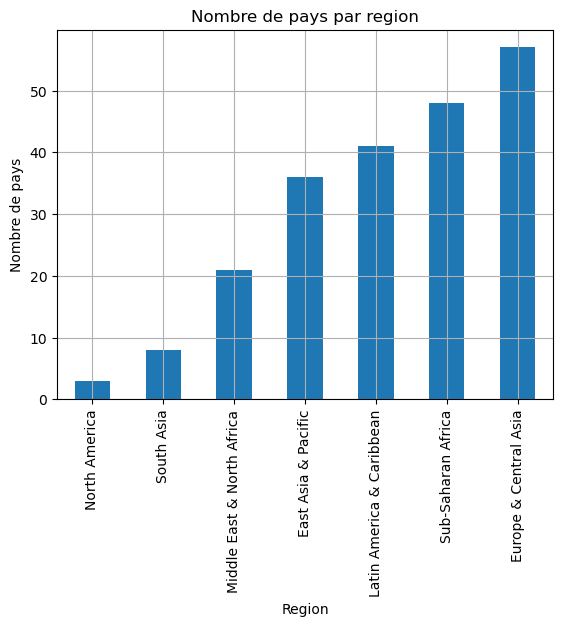

In [30]:
RTN.plot(kind='bar')
plt.ylabel('Nombre de pays')
plt.title("Nombre de pays par region")
plt.grid()
plt.show()

In [31]:
IGTN = cdata.groupby("Income Group")["Table Name"].count()
IGTN

Income Group
High income: OECD       31
High income: nonOECD    44
Low income              34
Lower middle income     50
Upper middle income     55
Name: Table Name, dtype: int64

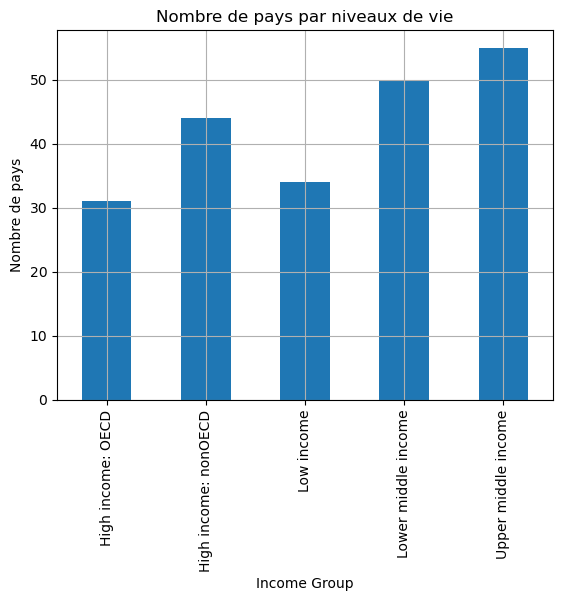

In [32]:
IGTN.plot(kind='bar')
plt.ylabel('Nombre de pays')
plt.title("Nombre de pays par niveaux de vie")
plt.grid()
plt.show()

In [33]:
RIG = cdata.groupby("Table Name")["Income Group","Region"]
RIGdata = RIG.value_counts()
RIGdata

/var/folders/60/mq_jpp_j34l34j4rjr1bt70m0000gn/T/ipykernel_2993/1923816751.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  RIG = cdata.groupby("Table Name")["Income Group","Region"]


Table Name             Income Group          Region                    
Afghanistan            Low income            South Asia                    1
Albania                Upper middle income   Europe & Central Asia         1
Algeria                Upper middle income   Middle East & North Africa    1
American Samoa         Upper middle income   East Asia & Pacific           1
Andorra                High income: nonOECD  Europe & Central Asia         1
                                                                          ..
Virgin Islands (U.S.)  High income: nonOECD  Latin America & Caribbean     1
West Bank and Gaza     Lower middle income   Middle East & North Africa    1
Yemen, Rep.            Lower middle income   Middle East & North Africa    1
Zambia                 Lower middle income   Sub-Saharan Africa            1
Zimbabwe               Low income            Sub-Saharan Africa            1
Length: 214, dtype: int64

In [34]:
RIGdata.sort_values().loc[:,(['High income: OECD']),:].iloc[:10]

Table Name       Income Group       Region               
Netherlands      High income: OECD  Europe & Central Asia    1
New Zealand      High income: OECD  East Asia & Pacific      1
Norway           High income: OECD  Europe & Central Asia    1
Poland           High income: OECD  Europe & Central Asia    1
Portugal         High income: OECD  Europe & Central Asia    1
Luxembourg       High income: OECD  Europe & Central Asia    1
United Kingdom   High income: OECD  Europe & Central Asia    1
United States    High income: OECD  North America            1
Slovak Republic  High income: OECD  Europe & Central Asia    1
Slovenia         High income: OECD  Europe & Central Asia    1
dtype: int64

In [35]:
#Extraction de colonnes pertinentes du fichier country
cdata.rename(columns={'Table Name':'Country Name'}, inplace=True)
extractioncdata=cdata.iloc[:,[0,7,8]]
extractioncdata

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD
...,...,...,...
236,XKX,Europe & Central Asia,Lower middle income
237,YEM,Middle East & North Africa,Lower middle income
238,ZAF,Sub-Saharan Africa,Upper middle income
239,ZMB,Sub-Saharan Africa,Lower middle income


In [36]:
extractioncdata.shape

(241, 3)

In [37]:
extractioncdata.isnull().sum()

Country Code     0
Region          27
Income Group    27
dtype: int64

In [38]:
extractioncdata = extractioncdata.dropna(thresh=2,axis=0)
extractioncdata

,Country Code,Region,Income Group
0,ABW,Latin America & Caribbean,High income: nonOECD
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Upper middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income: nonOECD
...,...,...,...
236,XKX,Europe & Central Asia,Lower middle income
237,YEM,Middle East & North Africa,Lower middle income
238,ZAF,Sub-Saharan Africa,Upper middle income
239,ZMB,Sub-Saharan Africa,Lower middle income


In [39]:
extractioncdata.shape

(214, 3)

# IV - Analyse des données du fichier FootNote

## 1. Description des informations du tableau

In [40]:
# Affichage de la taille du tableau (nombre de lignes & nombre de colonnes)
fndata.shape

(643638, 5)

In [41]:
# Nombres de valeurs dans le tableau
fnnull = fndata.notnull().sum().sum()
fnnull

2574552

In [42]:
#Affichage des noms et les types de colonne
fndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB


In [43]:
#Combien de pays et d'indicateur dans le fichier fndata ?
fndata.describe(exclude=np.number)

,CountryCode,SeriesCode,Year,DESCRIPTION
count,643638,643638,643638,643638
unique,239,1558,56,9102
top,LIC,SH.DYN.MORT,YR2004,Country Data
freq,7320,9226,27128,191188


## 2. Validation de la qualité du jeu de données

### A) Données manquantes

In [44]:
# Nombres de valeurs manquantes dans le tableau
fnnull = fndata.isnull().sum().sum()
fnnull

643638

In [45]:
# Vérification des taux valeurs manquantes par colonnes 
fnPourcentage = (fndata.isnull().sum() /len(fndata))*100
fnPourcentage

CountryCode      0.0
SeriesCode       0.0
Year             0.0
DESCRIPTION      0.0
Unnamed: 4     100.0
dtype: float64

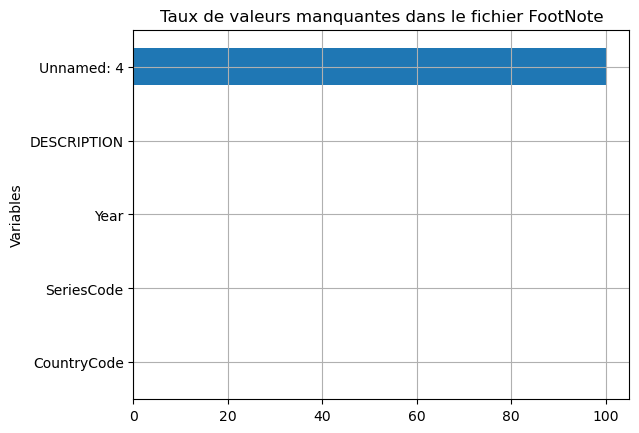

In [46]:
fnPourcentage.sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Variables')
plt.title("Taux de valeurs manquantes dans le fichier FootNote")
plt.grid()
plt.show()

In [47]:
# Vérification du taux valeurs manquantes totales du tableau
Totfnnull=(fnPourcentage.sum()/fndata.shape[1])
Totfnnull

20.0

In [48]:
# Suppression de la colonne vide
fndata = fndata.drop(columns='Unnamed: 4')

### B) Données dupliquées  

In [49]:
# Vérification des valeurs dupliqueés dans le jeu de données 
fndata.duplicated().sum()

0

In [50]:
fndata.duplicated(['CountryCode','SeriesCode','Year']).sum()

0

## 3. Sélection des informations qui semblent pertinentes pour répondre à la problématique 

# V - Analyse des données du fichier Series

## 1. Description des informations du tableau 

In [51]:
# Affichage de la taille du tableau (nombre de lignes & nombre de colonnes)
sdata.shape

(3665, 21)

In [52]:
# Nombres de valeurs dans le tableau
snull = sdata.notnull().sum().sum()
snull

21762

Text(0.5, 1.0, 'Nombre de données par variables')

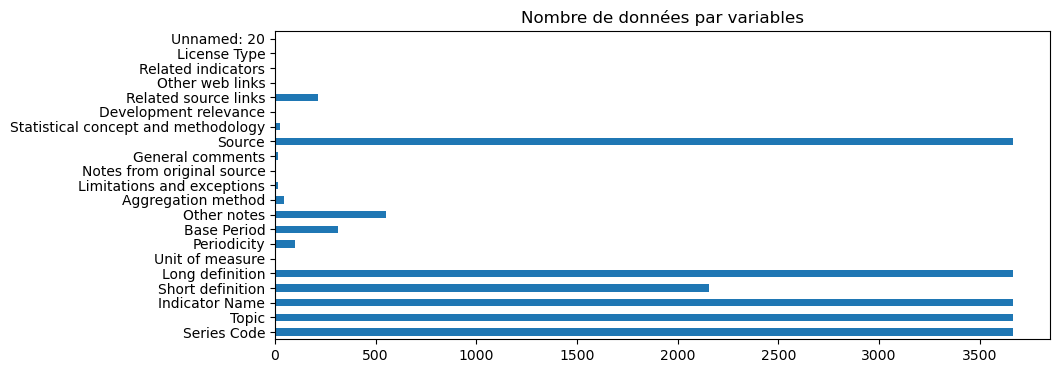

In [53]:
sdata.notnull().sum().plot(kind='barh',figsize=(10, 4))
plt.title('Nombre de données par variables')

In [54]:
#Affichage des noms et des types de colonne
sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

## 2. Validation de la qualité du jeu de données

### A) Données manquantes

In [55]:
# Nombres de valeurs manquantes dans le tableau
snull = sdata.isnull().sum().sum()
snull

55203

In [56]:
# Vérification des taux valeurs manquantes par colonnes 
sPourcentage = (sdata.isnull().sum() /len(sdata))*100
sPourcentage

Series Code                              0.000000
Topic                                    0.000000
Indicator Name                           0.000000
Short definition                        41.173261
Long definition                          0.000000
Unit of measure                        100.000000
Periodicity                             97.298772
Base Period                             91.432469
Other notes                             84.938608
Aggregation method                      98.717599
Limitations and exceptions              99.618008
Notes from original source             100.000000
General comments                        99.618008
Source                                   0.000000
Statistical concept and methodology     99.372442
Development relevance                   99.918145
Related source links                    94.133697
Other web links                        100.000000
Related indicators                     100.000000
License Type                           100.000000


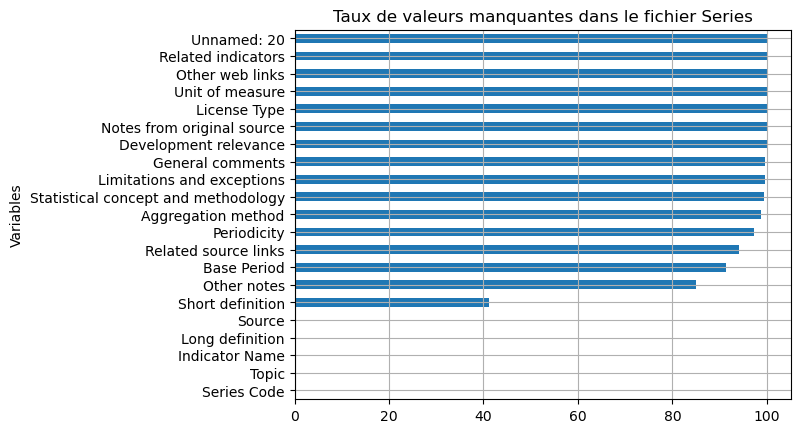

In [57]:
sPourcentage.sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Variables')
plt.title("Taux de valeurs manquantes dans le fichier Series")
plt.grid()
plt.show()

In [58]:
# Vérification du taux valeurs manquantes totales du tableau
Totsnull=(sPourcentage.sum()/sdata.shape[1])
Totsnull

71.72480997856168

In [59]:
sdata = sdata.dropna(thresh=2,axis=1)

In [60]:
# Vérification des taux valeurs manquantes par colonnes 
sPourcentage = (sdata.isnull().sum() /len(sdata))*100
sPourcentage
Totsnull=(sPourcentage.sum()/sdata.shape[1])
Totsnull

60.414733969986365

### B) Données dupliquées 

In [61]:
# Vérification des valeurs dupliquées dans le jeu de données 
sdata.duplicated().sum()

0

In [62]:
sdata.duplicated(['Indicator Name','Series Code']).sum()

0

## 3. Sélection des informations qui semblent pertinentes pour répondre à la problématique 

Text(0.5, 1.0, 'Nombre de données par variables')

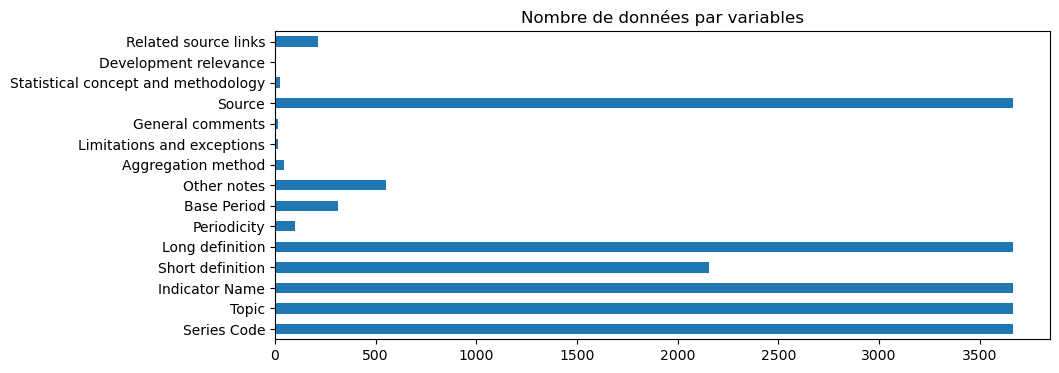

In [63]:
sdata.notnull().sum().plot(kind='barh',figsize=(10, 4))
plt.title('Nombre de données par variables')

In [64]:
#Combien d'indicateur code dans le fichier sdata ?
sdata['Series Code'].count()

3665

In [65]:
#Combien de thèmes dans le fichier sdata ?
sdata.describe(exclude=np.number)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance,Related source links
count,3665,3665,3665,2156,3665,99,314,552,47,14,14,3665,23,3,215
unique,3665,37,3665,1169,2060,1,4,14,3,9,8,31,2,1,1
top,BAR.NOED.1519.FE.ZS,Learning Outcomes,Barro-Lee: Percentage of female population age...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...,Annual,Projections (2010 to 2100),EGRA,Weighted average,Data should be used cautiously because of diff...,When NEET rates are available for more than tw...,UNESCO Institute for Statistics,TIMSS,Unemployment and total employment are the broa...,http://saber.worldbank.org/index.cfm
freq,1,1046,1,215,215,99,308,403,31,3,3,1269,20,3,215


In [66]:
extractionsdata=sdata.iloc[:,[0,1,2,4]]
#Combien de thèmes dans le fichier sdata ?
extractionsdata.describe()

,Series Code,Topic,Indicator Name,Long definition
count,3665,3665,3665,3665
unique,3665,37,3665,2060
top,BAR.NOED.1519.FE.ZS,Learning Outcomes,Barro-Lee: Percentage of female population age...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...
freq,1,1046,1,215


In [67]:
extractionsdata.groupby(["Topic"]).first()

,Series Code,Indicator Name,Long definition
Topic,,,
Attainment,BAR.NOED.1519.FE.ZS,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...
Background,SE.COM.DURS,Duration of compulsory education (years),Number of years that children are legally obli...
EMIS,UIS.AFR.SCHCENRESPR.1.PU,Africa Dataset: School census return rate from...,Share of all primary school questionnaires tha...
Early Child Development (SABER),SABER.ERL.CHLD.GOAL1,SABER: (Early Childhood Development) Policy Go...,Data Interpretation: 1=Latent; 2=Emerging; 3=E...
Early Childhood Education,SE.PRE.ENRL,"Enrolment in pre-primary education, both sexes...",Total number of students enrolled in public an...
Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita,NY.GNP.PCAP.CD,"GNI per capita, Atlas method (current US$)",GNI per capita (formerly GNP per capita) is th...
Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators,NY.GDP.MKTP.KD,GDP (constant 2010 US$),GDP at purchaser's prices is the sum of gross ...
Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators,NY.GDP.MKTP.CD,GDP (current US$),GDP at purchaser's prices is the sum of gross ...
Economic Policy & Debt: Purchasing power parity,NY.GDP.MKTP.PP.CD,"GDP, PPP (current international $)",PPP GDP is gross domestic product converted to...


In [68]:
#Combien de thème dans le fichier ?
extractionsdata['Topic'].value_counts().count()

37

In [69]:
#Combien d'indicateur par thème dans le fichier ?
extractionsdata['Topic'].value_counts()

Learning Outcomes                                                                               1046
Attainment                                                                                       733
Education Equality                                                                               426
Secondary                                                                                        256
Primary                                                                                          248
Population                                                                                       213
Tertiary                                                                                         158
Teachers                                                                                         137
Expenditures                                                                                      93
Engaging the Private Sector (SABER)                                                        

In [70]:
#Thème de recherche : Lycée (Secondary)
extractionsdata[extractionsdata['Topic'].isin(['Secondary'])]

,Series Code,Topic,Indicator Name,Long definition
2218,SE.ENR.PRSC.FM.ZS,Secondary,"Gross enrolment ratio, primary and secondary, ...",Ratio of female gross enrolment ratio for prim...
2219,SE.ENR.SECO.FM.ZS,Secondary,"Gross enrolment ratio, secondary, gender parit...",Ratio of female gross enrolment ratio for seco...
2287,SE.SEC.AGES,Secondary,Official entrance age to lower secondary educa...,Age at which students would enter lower second...
2288,SE.SEC.CMPT.LO.FE.ZS,Secondary,"Lower secondary completion rate, female (%)",Total number of new female entrants in the las...
2289,SE.SEC.CMPT.LO.MA.ZS,Secondary,"Lower secondary completion rate, male (%)",Total number of new male entrants in the last ...
...,...,...,...,...
3549,UIS.thAge.3.A.GPV,Secondary,Official entrance age to upper secondary educa...,Age at which students would enter upper second...
3553,UIS.TranRA.23.GPV.GPI,Secondary,Effective transition rate from primary to lowe...,The ratio of the female transition rate to the...
3578,UIS.UAPP.23,Secondary,Under-age enrolment ratio in secondary educati...,Percentage of the secondary school age populat...
3579,UIS.UAPP.23.F,Secondary,Under-age enrolment ratio in secondary educati...,Percentage of the female secondary school age ...


In [71]:
#Thème de recherche : Population
extractionsdata[extractionsdata['Topic'].isin(['Population'])]

,Series Code,Topic,Indicator Name,Long definition
2405,SP.POP.0305.FE.UN,Population,"Population, ages 3-5, female","Population, ages 3-5, female is the total numb..."
2406,SP.POP.0305.MA.UN,Population,"Population, ages 3-5, male","Population, ages 3-5, male is the total number..."
2407,SP.POP.0305.TO.UN,Population,"Population, ages 3-5, total","Population, ages 3-5, total is the total popul..."
2408,SP.POP.0406.FE.UN,Population,"Population, ages 4-6, female","Population, ages 4-6, female is the total numb..."
2409,SP.POP.0406.MA.UN,Population,"Population, ages 4-6, male","Population, ages 4-6, male is the total number..."
...,...,...,...,...
3474,UIS.SAP.4.F,Population,Population of the official age for post-second...,Female population of the age-group theoretical...
3475,UIS.SAP.4.M,Population,Population of the official age for post-second...,Male population of the age-group theoretically...
3476,UIS.SAP.CE,Population,"Population of compulsory school age, both sexe...",Population of children within the age span tha...
3477,UIS.SAP.CE.F,Population,"Population of compulsory school age, female (n...",Population of female children within the age s...


In [72]:
#Thème de recherche : Étude supérieure (Tertiary)
extractionsdata[extractionsdata['Topic'].isin(['Tertiary'])]

,Series Code,Topic,Indicator Name,Long definition
2220,SE.ENR.TERT.FM.ZS,Tertiary,"Gross enrolment ratio, tertiary, gender parity...",Ratio of female gross enrolment ratio for tert...
2284,SE.SCH.LIFE,Tertiary,"School life expectancy, primary to tertiary, b...",Number of years a person of school entrance ag...
2285,SE.SCH.LIFE.FE,Tertiary,"School life expectancy, primary to tertiary, f...",Number of years a person of school entrance ag...
2286,SE.SCH.LIFE.MA,Tertiary,"School life expectancy, primary to tertiary, m...",Number of years a person of school entrance ag...
2329,SE.TER.CMPL.FE.ZS,Tertiary,Gross graduation ratio from first degree progr...,Number of female graduates from first degree p...
...,...,...,...,...
3545,UIS.TEP.8,Tertiary,Percentage of all students in tertiary educati...,Total enrolment in doctoral or equivalent prog...
3546,UIS.TEP.8.F,Tertiary,Percentage of female students in tertiary educ...,Total female enrolment in doctoral or equivale...
3547,UIS.TEP.8.M,Tertiary,Percentage of male students in tertiary educat...,Total male enrolment in doctoral or equivalent...
3550,UIS.thAge.4.A.GPV,Tertiary,Official entrance age to post-secondary non-te...,Age at which students would enter post-seconda...


In [73]:
#Thème de recherche : Infrastructure: Communications
extractionsdata[extractionsdata['Topic'].isin(['Infrastructure: Communications'])]

,Series Code,Topic,Indicator Name,Long definition
610,IT.CMP.PCMP.P2,Infrastructure: Communications,Personal computers (per 100 people),Personal computers are self-contained computer...
611,IT.NET.USER.P2,Infrastructure: Communications,Internet users (per 100 people),Internet users are individuals who have used t...


In [74]:
# Recherche avancée avec codes clés : 1524 (Âge)
extractionsdata[extractionsdata['Series Code'].str.contains('1524')]

,Series Code,Topic,Indicator Name,Long definition
2209,SE.ADT.1524.LT.FE.ZS,Literacy,"Youth literacy rate, population 15-24 years, f...",Number of females age 15 to 24 years who can b...
2210,SE.ADT.1524.LT.FM.ZS,Literacy,"Youth literacy rate, population 15-24 years, g...",Ratio of female youth literacy rate to male yo...
2211,SE.ADT.1524.LT.MA.ZS,Literacy,"Youth literacy rate, population 15-24 years, m...",Number of males age 15 to 24 years who can bot...
2212,SE.ADT.1524.LT.ZS,Literacy,"Youth literacy rate, population 15-24 years, b...",Number of people age 15 to 24 years who can bo...
2504,SP.POP.1524.FE.UN,Population,"Population, ages 15-24, female","Population, ages 15-24, female is the total nu..."
2505,SP.POP.1524.MA.UN,Population,"Population, ages 15-24, male","Population, ages 15-24, male is the total numb..."
2506,SP.POP.1524.TO.UN,Population,"Population, ages 15-24, total","Population, ages 15-24, total is the total pop..."


# VI - Analyse des données du fichier Data

## 1. Description des informations du tableau 

In [75]:
# Affichage du nombre de lignes & nombre de colonnes
data.shape

(886930, 70)

In [76]:
# Nombres de valeurs dans le tableau
nnull = data.notnull().sum().sum()
nnull

8629921

In [77]:
#Affichage des noms et les types de colonne
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [78]:
data['Country Code'].value_counts().sum()

886930

In [79]:
#Combien de pays dans le fichier data ?
data['Country Code'].value_counts().duplicated().sum()

241

In [80]:
#Variables quantitatives
data.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [81]:
#Variables qualitatives
data.loc[:,'Country Name':'Indicator Code'].describe()

,Country Name,Country Code,Indicator Name,Indicator Code
count,886930,886930,886930,886930
unique,242,242,3665,3665
top,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2
freq,3665,3665,242,242


## 2. Validation de la qualité du jeu de données

### A) Données manquantes 

In [82]:
# Nombres de valeurs dans le tableau
null = data.isnull().sum().sum()
null

53455179

In [83]:
# Vérification des taux valeurs manquantes par colonnes 
Pourcentagenull = (data.isnull().sum() /len(data))*100
Pourcentagenull

Country Name        0.000000
Country Code        0.000000
Indicator Name      0.000000
Indicator Code      0.000000
1970               91.849639
                     ...    
2085               94.200670
2090               94.200670
2095               94.200670
2100               94.200670
Unnamed: 69       100.000000
Length: 70, dtype: float64

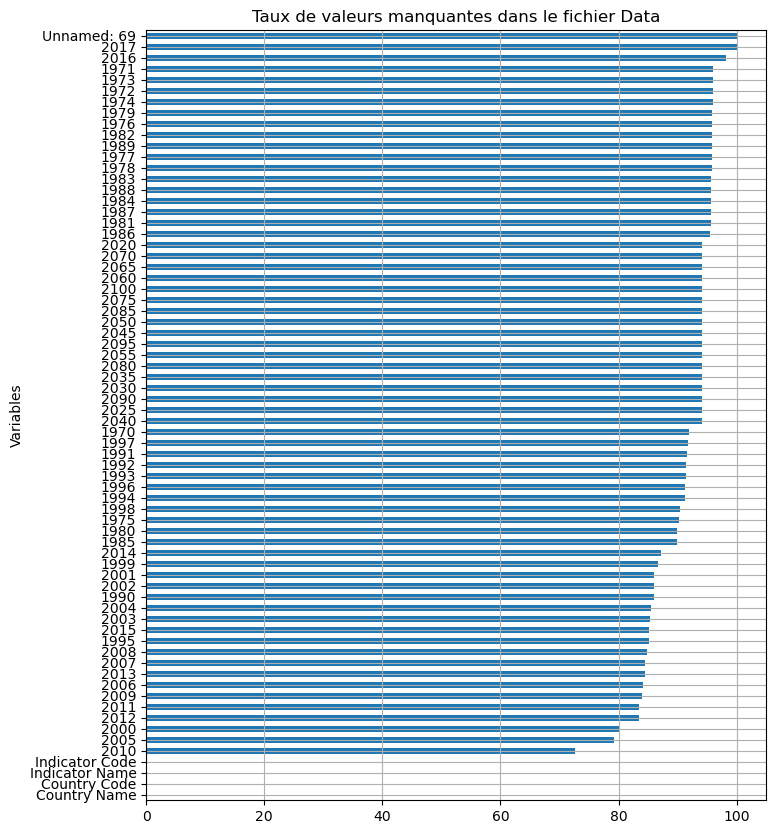

In [84]:
Pourcentagenull.sort_values(ascending=True).plot(kind='barh',figsize=(8, 10))
plt.ylabel('Variables')
plt.title("Taux de valeurs manquantes dans le fichier Data")
plt.grid()
plt.show()

In [85]:
# Vérification du taux valeurs manquantes totales du tableau
Totnull=(Pourcentagenull.sum()/data.shape[1])
Totnull

86.09985165522806

In [86]:
# Supprimez les colonnes vides 
data = data.dropna(thresh=2,axis=1)
data.shape

(886930, 69)

In [87]:
# Vérification des valeurs manquantes par ligne
data.isnull().sum(axis=1)

0         65
1         65
2         65
3         65
4         20
          ..
886925    61
886926    61
886927    61
886928    61
886929    61
Length: 886930, dtype: int64

In [88]:
data.shape

(886930, 69)

In [89]:
# Supprimez les lignes avec valeurs manquantes 
data = data.dropna(thresh=5)

In [90]:
data.isnull().sum(axis=1).sum()

18149124

In [91]:
data.isnull().sum(axis=1)

4         20
5         20
6         20
7         20
12        20
          ..
886925    61
886926    61
886927    61
886928    61
886929    61
Length: 357405, dtype: int64

In [92]:
# Vérification du taux valeurs manquantes totales du tableau (après)
Pourcentagenull = (data.isnull().sum() /len(data))*100
Pourcentagenull
Totnull=(Pourcentagenull.sum()/data.shape[1])
Totnull

73.5946006935257

In [93]:
data.shape

(357405, 69)

Text(0.5, 1.0, 'Nombre de données par années')

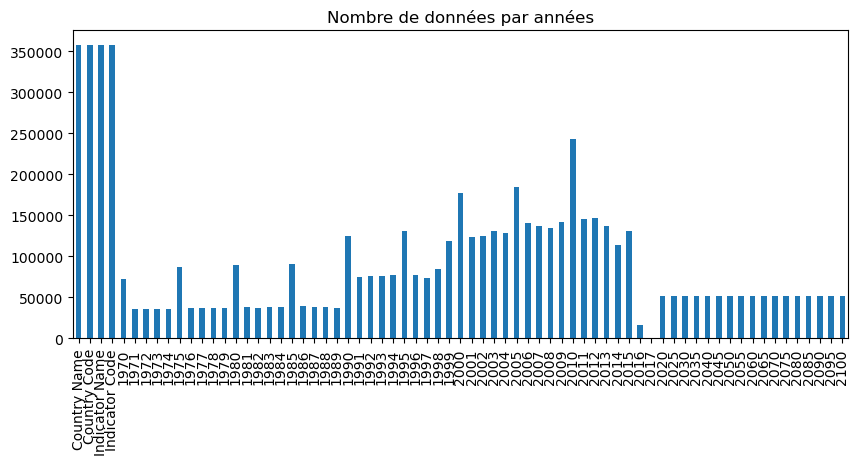

In [94]:
data.notnull().sum().plot(kind='bar',figsize=(10, 4))
plt.title('Nombre de données par années')

Text(0.5, 1.0, 'Nombre des données des indicateurs retenus par variables')

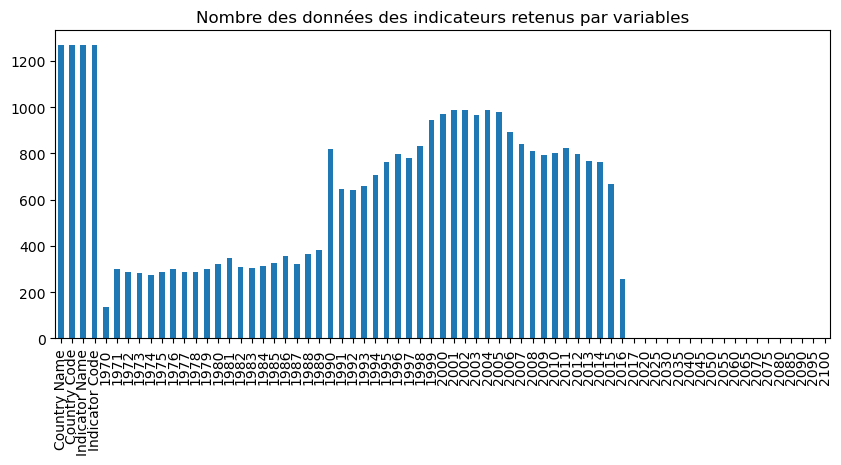

In [95]:
Ieduc=['SE.SEC.ENRR' ,'SE.TER.ENRR' ,'SE.ADT.1524.LT.ZS']
Iinfra=['IT.CMP.PCMP.P2', 'IT.NET.USER.P2']
Ipop=['SP.POP.1524.TO.UN']
Indiretenus = Ieduc + Iinfra + Ipop
Gdata=data[data['Indicator Code'].isin(Indiretenus)]
Gdata.notnull().sum().plot(kind='bar',figsize=(10, 4))
plt.title('Nombre des données des indicateurs retenus par variables')

In [96]:
# Suppresssion des colonnes 2017 à 2100 
data = data.drop(data.loc[:,'2017':'2100'],axis=1)
data

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.365540,...,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN
5,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,43.351101,43.318150,44.640701,45.845718,46.449501,48.363892,...,80.582420,81.473801,81.695686,82.871651,82.861389,84.401413,83.914032,83.820831,NaN,NaN
6,Arab World,ARB,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,0.658570,0.656400,0.663290,0.672040,0.672610,0.691760,...,0.938460,0.942500,0.943470,0.947620,0.946700,0.962080,0.964090,0.966200,NaN,NaN
7,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,65.826233,65.993584,67.301857,68.219078,69.059013,69.914551,...,85.866692,86.444138,86.590691,87.452583,87.526520,87.728172,87.039879,86.753387,NaN,NaN
12,Arab World,ARB,Adjusted net intake rate to Grade 1 of primary...,UIS.NIRA.1,52.448921,52.489750,52.635593,53.327000,54.184654,54.865627,...,75.595695,74.893944,74.814552,76.197044,76.474968,77.319366,76.566711,76.620567,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,166679.000000,NaN,NaN,199464.000000,NaN,NaN
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,90.930700,NaN,NaN,90.428120,NaN,NaN
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,92.124560,NaN,NaN,93.188350,NaN,NaN
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.028280,NaN,NaN,1.063890,NaN,NaN


### B) Données dupliquées 

In [97]:
# Vérification des valeurs dupliqueés dans le jeu de données 
data.duplicated(['Country Name','Indicator Name','Indicator Code']).sum()

0

## 3. Sélection des informations qui semblent pertinentes pour répondre à la problématique 

In [98]:
# Jointure entre les fichier data complet et extractioncdata qui est une extraction des colonnes pertinentes dans le fichier Country
Globdata= pd.merge(data, extractioncdata,on='Country Code')
Globdata
#(deplacer colonnes)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,Region,Income Group
0,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,7.05911,NaN,...,NaN,NaN,NaN,NaN,47.436790,50.627232,NaN,NaN,South Asia,Low income
1,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,2.53138,NaN,...,NaN,NaN,NaN,NaN,34.073261,37.641541,NaN,NaN,South Asia,Low income
2,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,0.22154,NaN,...,NaN,NaN,NaN,NaN,0.567060,0.598370,NaN,NaN,South Asia,Low income
3,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,11.42652,NaN,...,NaN,NaN,NaN,NaN,60.087059,62.906952,NaN,NaN,South Asia,Low income
4,Afghanistan,AFG,"Adjusted net enrolment rate, primary, gender p...",UIS.NERA.1.GPI,NaN,NaN,NaN,NaN,0.19066,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Asia,Low income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347343,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,166679.00000,NaN,NaN,199464.000000,NaN,NaN,Sub-Saharan Africa,Low income
347344,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,90.93070,NaN,NaN,90.428120,NaN,NaN,Sub-Saharan Africa,Low income
347345,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,92.12456,NaN,NaN,93.188350,NaN,NaN,Sub-Saharan Africa,Low income
347346,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.02828,NaN,NaN,1.063890,NaN,NaN,Sub-Saharan Africa,Low income


In [99]:
Globdata = Globdata.dropna(thresh=7,axis=0)
Globdata.shape
Globdata.isnull()

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,Region,Income Group
0,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,False,False,True,True,False,False
1,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,False,False,True,True,False,False
2,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,False,False,True,True,False,False
3,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,False,False,True,True,False,False
4,False,False,False,False,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347343,False,False,False,False,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,False,False
347344,False,False,False,False,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,False,False
347345,False,False,False,False,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,False,False
347346,False,False,False,False,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,False,False


In [100]:
Globdata=Globdata[Globdata['Income Group'].isin(['High income: OECD'])]
Globdata
#comment faire une liste

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2009,2010,2011,2012,2013,2014,2015,2016,Region,Income Group
13674,Australia,AUS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,87.168427,86.222816,85.811722,85.947922,86.202271,NaN,NaN,NaN,East Asia & Pacific,High income: OECD
13675,Australia,AUS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,89.112907,88.005913,87.499138,87.669609,87.703598,NaN,NaN,NaN,East Asia & Pacific,High income: OECD
13676,Australia,AUS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,1.043900,1.040700,1.038700,1.039490,1.034300,NaN,NaN,NaN,East Asia & Pacific,High income: OECD
13677,Australia,AUS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,85.365509,84.564171,84.238747,84.339340,84.795174,NaN,NaN,NaN,East Asia & Pacific,High income: OECD
13678,Australia,AUS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,...,96.839798,97.105652,97.765762,97.655258,97.450394,97.138184,97.160408,NaN,East Asia & Pacific,High income: OECD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331802,United States,USA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5078.500000,NaN,NaN,NaN,NaN,5032.700000,NaN,North America,High income: OECD
331803,United States,USA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MF,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,10059.850000,NaN,NaN,NaN,NaN,9471.060000,NaN,North America,High income: OECD
331804,United States,USA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.FE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,65362.330000,NaN,NaN,NaN,NaN,67158.610000,NaN,North America,High income: OECD
331805,United States,USA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,61750.280000,NaN,NaN,NaN,NaN,65022.600000,NaN,North America,High income: OECD


Text(0.5, 1.0, 'Nombre de donnée des indicateurs retenus avec un haut niveau de vie')

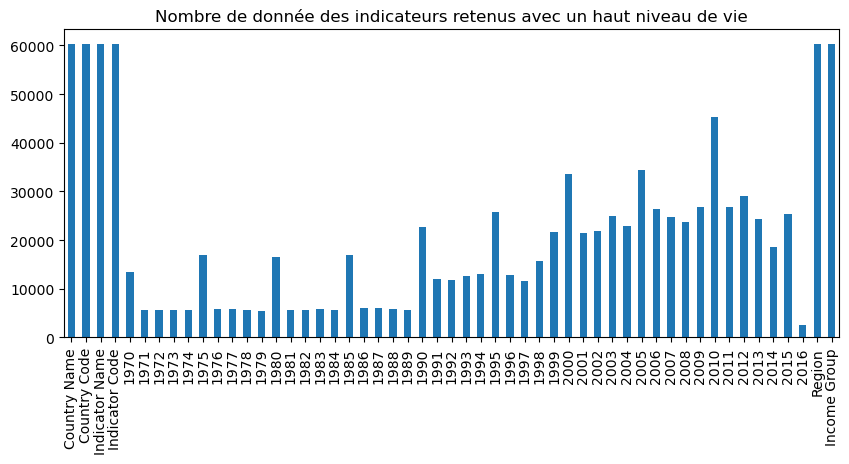

In [101]:
Globdata.notnull().sum().plot(kind='bar',figsize=(10, 4))
plt.title('Nombre de donnée des indicateurs retenus avec un haut niveau de vie')

In [102]:
#Suppresssion des années sauf 2015 (Années la plus proche)
Globdata = Globdata.drop(['2016'],axis=1) #Trés peu de données
Globdata = Globdata.drop(Globdata.loc[:,'1970':'2014'],axis=1)
Globdata

,Country Name,Country Code,Indicator Name,Indicator Code,2015,Region,Income Group
13674,Australia,AUS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,East Asia & Pacific,High income: OECD
13675,Australia,AUS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,East Asia & Pacific,High income: OECD
13676,Australia,AUS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,East Asia & Pacific,High income: OECD
13677,Australia,AUS,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,East Asia & Pacific,High income: OECD
13678,Australia,AUS,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,97.160408,East Asia & Pacific,High income: OECD
...,...,...,...,...,...,...,...
331802,United States,USA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MA,5032.700000,North America,High income: OECD
331803,United States,USA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.1.MF,9471.060000,North America,High income: OECD
331804,United States,USA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.FE,67158.610000,North America,High income: OECD
331805,United States,USA,Wittgenstein Projection: Population in thousan...,PRJ.POP.ALL.3.MA,65022.600000,North America,High income: OECD


Text(0.5, 1.0, 'Nombre de donnée des indicateurs retenus en 2015')

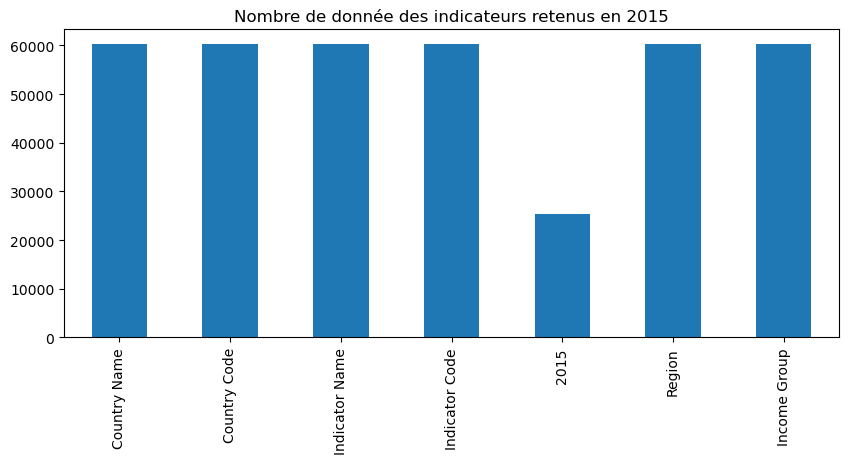

In [103]:
Globdata.notnull().sum().plot(kind='bar',figsize=(10, 4))
plt.title('Nombre de donnée des indicateurs retenus en 2015')

In [104]:
Educsec=Globdata[Globdata['Indicator Code'].isin(['SE.SEC.ENRR'])]
Educsec

,Country Name,Country Code,Indicator Name,Indicator Code,2015,Region,Income Group
14299,Australia,AUS,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,East Asia & Pacific,High income: OECD
16170,Austria,AUT,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,100.021889,Europe & Central Asia,High income: OECD
27773,Belgium,BEL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,166.808472,Europe & Central Asia,High income: OECD
56600,Canada,CAN,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,North America,High income: OECD
63018,Chile,CHL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,100.646187,Latin America & Caribbean,High income: OECD
85157,Czech Republic,CZE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,105.561729,Europe & Central Asia,High income: OECD
87165,Denmark,DNK,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,130.824738,Europe & Central Asia,High income: OECD
101553,Estonia,EST,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,115.178223,Europe & Central Asia,High income: OECD
106661,Finland,FIN,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,149.456085,Europe & Central Asia,High income: OECD
108706,France,FRA,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,NaN,Europe & Central Asia,High income: OECD


In [105]:
Educsec.shape

(31, 7)

In [106]:
Educsec=Educsec.dropna()
Educsec

,Country Name,Country Code,Indicator Name,Indicator Code,2015,Region,Income Group
16170,Austria,AUT,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,100.021889,Europe & Central Asia,High income: OECD
27773,Belgium,BEL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,166.808472,Europe & Central Asia,High income: OECD
63018,Chile,CHL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,100.646187,Latin America & Caribbean,High income: OECD
85157,Czech Republic,CZE,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,105.561729,Europe & Central Asia,High income: OECD
87165,Denmark,DNK,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,130.824738,Europe & Central Asia,High income: OECD
101553,Estonia,EST,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,115.178223,Europe & Central Asia,High income: OECD
106661,Finland,FIN,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,149.456085,Europe & Central Asia,High income: OECD
116560,Germany,DEU,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,102.665398,Europe & Central Asia,High income: OECD
148070,Ireland,IRL,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,127.481918,Europe & Central Asia,High income: OECD
150123,Israel,ISR,"Gross enrolment ratio, secondary, both sexes (%)",SE.SEC.ENRR,102.478813,Middle East & North Africa,High income: OECD


In [107]:
Educsec.shape

(20, 7)

In [108]:
Educsec=Educsec.groupby(["Country Name","Region"]).mean()         
Educsec= Educsec.groupby(["Country Name","Region"]).mean().sort_values(by="2015",ascending=False)

In [109]:
Educter=Globdata[Globdata['Indicator Code'].isin(['SE.TER.ENRR'])].dropna()
Educter=Educter.groupby(["Country Name","Region"]).mean().sort_values(by="2015",ascending=False)

In [110]:
POPGlobdata=Globdata[Globdata['Indicator Code'].isin(['SP.POP.1524.TO.UN'])].dropna()
POPGlobdata=POPGlobdata.groupby(["Country Name","Region"]).mean().sort_values(by="2015",ascending=False)

In [111]:
AlphGlobdata=Globdata[Globdata['Indicator Code'].isin(['SE.ADT.1524.LT.ZS'])].dropna()
AlphGlobdata=AlphGlobdata.groupby(["Country Name","Region"]).mean().sort_values(by="2015",ascending=False)
AlphGlobdata

,,2015
Country Name,Region,
Spain,Europe & Central Asia,99.65568


In [112]:
PCGlobdata=Globdata[Globdata['Indicator Code'].isin(['IT.CMP.PCMP.P2'])].dropna()
PCGlobdata=PCGlobdata.groupby(["Country Name","Region"]).mean().sort_values(by="2015",ascending=False)
PCGlobdata

,,2015
Country Name,Region,


In [113]:
NETGlobdata=Globdata[Globdata['Indicator Code'].isin(['IT.NET.USER.P2'])].dropna()
NETGlobdata= NETGlobdata.groupby(["Country Name","Region"]).mean().sort_values(by="2015",ascending=False)

In [114]:
# Jointure entre les differentes moyennes des pays en fonction des indicateurs\n",
Ind = [Educsec, Educter, POPGlobdata, NETGlobdata]
Synthése1= pd.merge(Educsec, Educter,how='outer',on='Country Name')
Synthése2= pd.merge(POPGlobdata, NETGlobdata,how='outer',on='Country Name')
Synthése= pd.merge(Synthése1, Synthése2,how='outer',on='Country Name')

#Renommer les colonnes
Synthése.rename(columns = {'2015_x_x':'SE.SEC.ENRR'}, inplace = True)
Synthése.rename(columns = {'2015_y_x':'SE.TER.ENRR'}, inplace = True)
Synthése.rename(columns = {'2015_x_y':'SP.POP.1524.TO.UN'}, inplace = True)
Synthése.rename(columns = {'2015_y_y':'IT.NET.USER.P2'}, inplace = True)

In [115]:
Synthése

,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,IT.NET.USER.P2
Country Name,,,,
Belgium,166.808472,75.036827,1241946.0,85.052900
Finland,149.456085,87.289703,639391.0,86.422133
Sweden,140.458832,62.300770,1134811.0,90.610200
Netherlands,135.473801,NaN,2005912.0,91.724138
Denmark,130.824738,82.786972,710024.0,96.330500
Spain,129.810486,89.670143,4285743.0,78.689600
Ireland,127.481918,83.777786,580379.0,80.122400
Portugal,119.135193,61.874191,1148782.0,68.632900
New Zealand,116.591591,83.931320,615099.0,88.222889


In [120]:
Pscandinave=['Denmark','Norway','Sweden']
Pscandinave
Pscandinave=Synthése.loc[Pscandinave]
Pscandinave.describe()

,SE.SEC.ENRR,SE.TER.ENRR,SP.POP.1524.TO.UN,IT.NET.USER.P2
count,3.000000,3.000000,3.000000e+00,3.000000
mean,128.090937,73.928041,8.305987e+05,94.583667
std,13.937354,10.519929,2.653358e+05,3.449475
min,112.989243,62.300770,6.469610e+05,90.610200
25%,121.906990,69.498575,6.784925e+05,93.470350
50%,130.824738,76.696381,7.100240e+05,96.330500
75%,135.641785,79.741676,9.224175e+05,96.570400
max,140.458832,82.786972,1.134811e+06,96.810300
